# <span style='font-family:Inter Black'> Theory
    
## <span style='font-family:Inter'> Two Assets Case

Return of a Portfolio in a certain time $t$ is simply defined as the weighted sum of each of its $n$ components return, i.e.

$$
\begin{equation}
\text{R}_p^{(t)} = \sum_{i}^{n} \text{w}_i^{(t)} \text{r}_i^{(t)}\tag{1}
\end{equation}
$$

In a two assets world:

$$
\text{R}_p^{(t)} = \text{w}_1^{(t)} \text{r}_1^{(t)} + \text{w}_2^{(t)} \text{r}_2^{(t)}
$$

Over time, portfolio return will be a vector of returns where each day's return is computed as in $(1)$:

$$
\text{R}_p = \text{w}_1 \text{r}_1 + \text{w}_2 \text{r}_2
$$


Its variance and standard deviation are respectivelyis (dropping the time notation):

$$
\sigma_p^2= \text{w}_1^{2} \sigma_1^{2} + \text{w}_2^{2} \sigma_2^{2} + 2\text{w}_1\text{w}_2\sigma_{12}\\
\sigma_p^2= \text{w}_1^{2} \sigma_1^{2} + \text{w}_2^{2} \sigma_2^{2} + 2\text{w}_1\text{w}_2\sigma_{1}\sigma_{2}\rho_{12}
$$

Then

$$
\sigma_p= \sqrt{\text{w}_1^{2} \sigma_1^{2} + \text{w}_2^{2} \sigma_2^{2} + 2\text{w}_1\text{w}_2\sigma_{12}}\\
\sigma_p= \sqrt{\text{w}_1^{2} \sigma_1^{2} + \text{w}_2^{2} \sigma_2^{2} + 2\text{w}_1\text{w}_2\sigma_{1}\sigma_{2}\rho_{12}}
$$

The time average growth rate of a portfolio is:
$$\mu - \frac{\sigma^2}{2} $$    

    
For our portfolio, the time average growth rate:    
$$g_m = \text{R}_p - \frac{\sigma^2_p}{2} $$    
    
$$
g_m^{'} = r_1 - r_2 - \sigma_1^2w_1 + \sigma_2^2 -w_1\sigma_2^2 -\rho \sigma_1 \sigma_2 + 2 \rho \sigma_1 \sigma_2 w_1 = 0 \iff\\
w_1 (-\sigma_1^2 -\sigma_2^2 + 2 \rho \sigma_1 \sigma_2) = -r_1 + r_2 - \sigma_2^2 + \rho \sigma_1 \sigma_2\\
w_1 = \frac{-r_1 + r_2 - \sigma_2^2 +\rho \sigma_1 \sigma_2}{(-\sigma_1^2 -\sigma_2^2 + 2 \rho \sigma_1 \sigma_2)}
$$  

In [1]:
import sys
import itertools
import numpy as np
import pandas as pd

sys.path.insert(0, r'C:\Users\lucab\PycharmProjects\Warehouse')

In [25]:
from primitive import rebase_at_x
from Viz.charting import generate_ax
from Finance.primitive import BrownianMotion

In [27]:
# FIXED PARAMS
high_mean = 0.005
low_mean = 0.003
sigma_1 = 0.05
sigma_2 = 0.04

# VARIABLE PARAMS
rho_l = np.arange(-1, 1, 0.01) 
w_1 = np.arange(0, 1, 0.01)

In [66]:
params = pd.DataFrame(list(itertools.product(w_1, rho_l)), columns=['w_1', 'rho'])
w1 = params.loc[:, 'w_1']
w2 = 1 - params.loc[:, 'w_1']
rho = params.loc[:, 'rho']

In [67]:
ptf_vol = (sigma_1**2 * w1**2) + (sigma_2**2 * w2**2) + 2 * w1 * w2 * sigma_1 * sigma_2 * rho
ptf_ret = (w1 * high_mean) + (w2 * low_mean)  - ptf_vol / 2

In [68]:
params['return'] = ptf_ret
params_pivot = round(params, 5).pivot('w_1', 'rho', 'return')

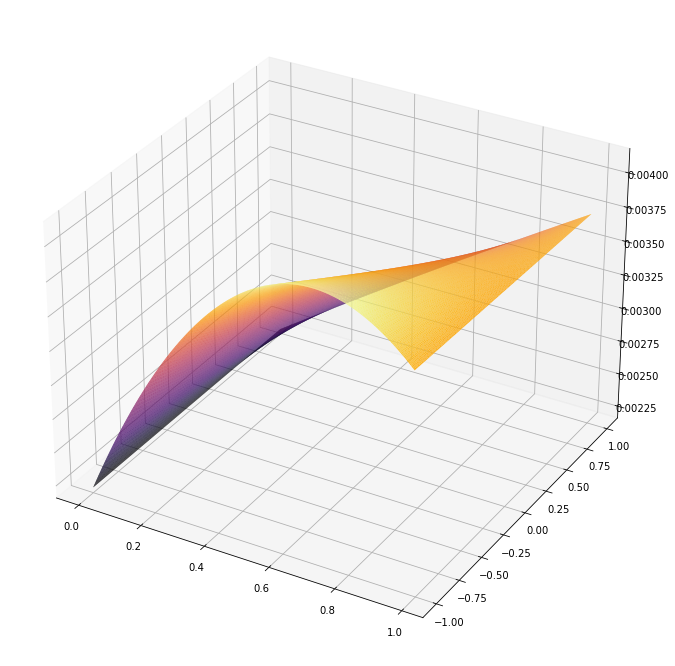

In [69]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20, 12))
ax = fig.add_subplot(projection='3d')
ax.plot_trisurf(params.loc[:, 'w_1'], params.loc[:, 'rho'], params.loc[:, 'return'], norm=None, vmin=None, vmax=None, lightsource=None, cmap='inferno')
plt.show()

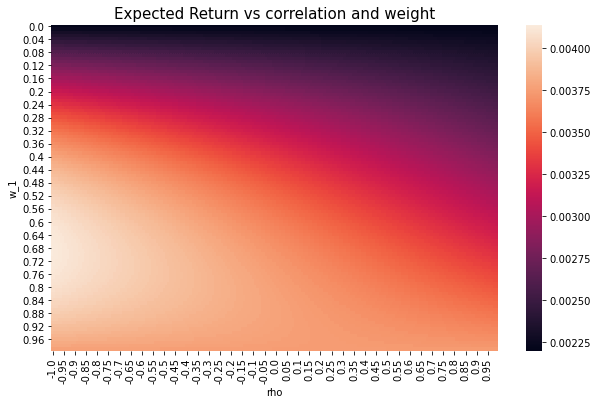

In [72]:
import seaborn as sns
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot()
params_pivot = round(params, 5).pivot('w_1', 'rho', 'return')
sns.heatmap(params_pivot, ax=ax)
ax.set_title('Expected Return vs correlation and weight', size=15)
plt.show()

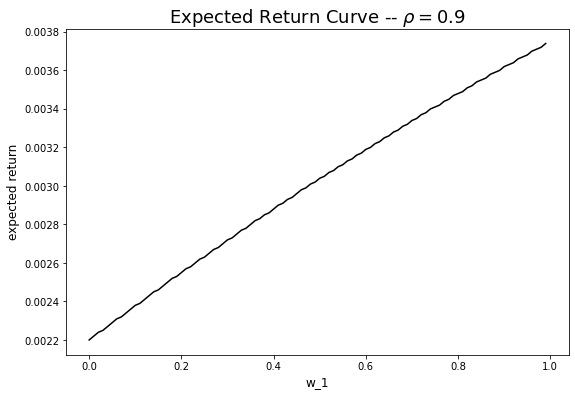

In [9]:
show_rho = 0.9
ax = generate_ax(r'Expected Return Curve -- $\rho=%s$' %str(show_rho), 'time', 'expected return')
params_pivot.loc[:, show_rho].plot(cmap='inferno', ax=ax)
plt.show()

In [35]:
chosen_rho = -1
def time_average_optimal_w(mu_1, mu_2, sigma_1, sigma_2, rho):
    opt_w = (-mu_1 + mu_2 - sigma_2**2 + rho * sigma_1 * sigma_2)/(-sigma_1**2 -sigma_2**2 + 2 * rho *sigma_1 * sigma_2)
    return opt_w    
        

def time_average(w1, mu_1, mu_2, sigma_1, sigma_2, rho):    
    w2 = 1 - w1
    return w1 * mu_1 + w2 * mu_2 - 1/2 * (w1**2 * sigma_1**2 + w2**2 * sigma_2**2 + 2 * rho * sigma_1 * sigma_2 * w1 * w2)
    

optimal_weight = time_average_optimal_w(high_mean, low_mean, sigma_1, sigma_2, chosen_rho)
ptf_time_average = time_average(optimal_weight, high_mean, low_mean, sigma_1, sigma_2, chosen_rho)

print('Optimal Weight: ' + str(round(optimal_weight * 100, 3)) + r'%')
print('Assets Time Average: 1st > ' + str(round((high_mean - sigma_1**2/2) * 100, 3)) + r'%')
print('Assets Time Average: 2st > ' + str(round((low_mean - sigma_2**2/2) * 100, 3)) + r'%')
print('Optimal Ptf Time Average: ' + str(round(ptf_time_average * 100, 3)) + r'%')

Optimal Weight: 69.136%
Assets Time Average: 1st > 0.375%
Assets Time Average: 2st > 0.22%
Optimal Ptf Time Average: 0.414%


## <span style='font-family:Inter'> Two Assets Example

In [23]:
T = 10000

In [28]:
gbm_high = BrownianMotion(S0=100, mu=high_mean, sigma=sigma_1, T=T, I=1)
gbm_low = BrownianMotion(S0=100, mu=low_mean, sigma=sigma_2, T=T, I=1)

In [29]:
gbm = pd.concat([gbm_high, gbm_low], axis=1)
gbm.columns = ['high', 'low']
gbm_ret = gbm.pct_change()

w = 0.5

bmk_ret = gbm_ret.loc[:, 'high'] * w + gbm_ret.loc[:, 'low'] * (1-w)  
bmk = rebase_at_x((bmk_ret.fillna(0) + 1).cumprod())
gbm['benchmark'] = bmk

<AxesSubplot:title={'center':'GBM - High and Low Mean'}, xlabel='time', ylabel='y'>

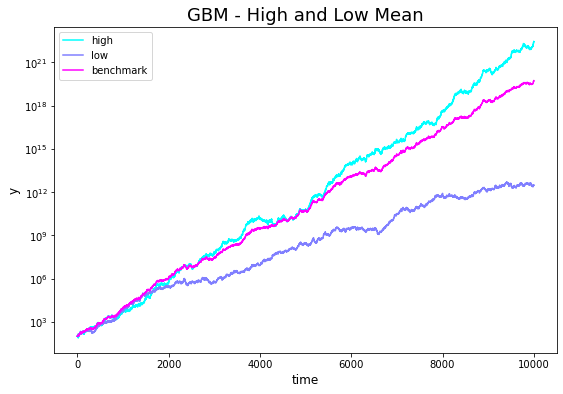

In [30]:
ax = generate_ax('GBM - High and Low Mean', 'time', 'y')
gbm.plot(logy=True, ax=ax, cmap='cool')

In [31]:
signal_noise_high = 0.002
signal_noise_low = 0.002
signal_high = pd.Series(np.random.normal(high_mean, signal_noise_high, T))
signal_low = pd.Series(np.random.normal(low_mean, signal_noise_low, T))
perfect_signal_high = pd.Series(np.random.normal(high_mean, 0, T))
perfect_signal_low = pd.Series(np.random.normal(low_mean, 0, T))

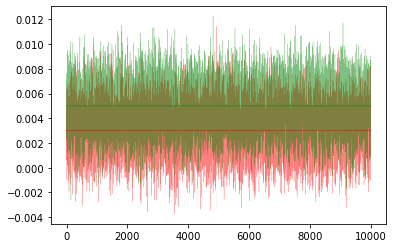

In [32]:
signal_low.plot(color='red', linewidth=0.3, alpha=0.5)
signal_high.plot(color='green', linewidth=0.3, alpha=0.5)
perfect_signal_low.plot(color='red', linewidth=0.5)
perfect_signal_high.plot(color='green', linewidth=0.5)
plt.show()

In [36]:
strat_w_l = []
perfect_strat_w_l = []
for row in pd.concat([signal_high, signal_low, perfect_signal_high, perfect_signal_low], axis=1).iterrows():
    strat_w_l.append(time_average_optimal_w(row[1].values[0], row[1].values[1], sigma_1, sigma_2, 0))
    perfect_strat_w_l.append(time_average_optimal_w(row[1].values[2], row[1].values[3], sigma_1, sigma_2, 0))
    
strat_w = pd.Series(strat_w_l)
perfect_strat_w = pd.Series(perfect_strat_w_l)

In [37]:
strat_ret = gbm_ret.loc[:, 'high'] * strat_w + gbm_ret.loc[:, 'low'] * (1-strat_w)  
strat = rebase_at_x((strat_ret.fillna(0) + 1).cumprod())

perfect_strat_ret = gbm_ret.loc[:, 'high'] * perfect_strat_w + gbm_ret.loc[:, 'low'] * (1-perfect_strat_w)  
perfect_strat = rebase_at_x((perfect_strat_ret.fillna(0) + 1).cumprod())

gbm['strat'] = strat
gbm['perf_strat'] = perfect_strat

<AxesSubplot:title={'center':'GBM - High and Low Mean'}, xlabel='time', ylabel='y'>

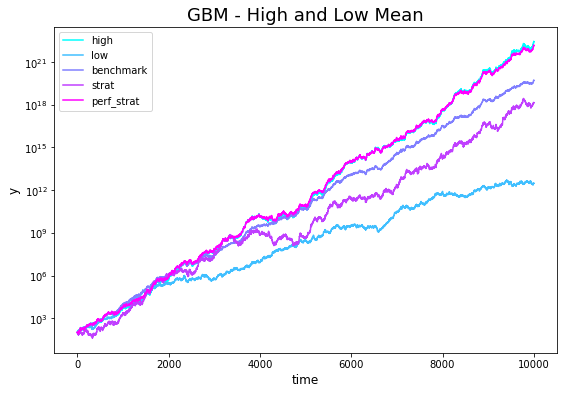

In [38]:
ax = generate_ax('GBM - High and Low Mean', 'time', 'y')
gbm.plot(logy=True, ax=ax, cmap='cool')

# <span style='font-family:Inter Black'> Practice </span>

<div class="alert alert-info">
<span style='font-family:Inter Black'> Signals Hints </span> 
<br>

- **A signal that works well on a stand alone basis CAN WORK BAD in aggregate** if the relative signals are bad / they are very correlated and if the portfolio has to sum to 1 (no leverage or cash allowed) 
- **A signal that works good on a stand alone basis CAN WORK GOOD in aggregate**, if the relative signals are good / they have low correlation and if the portfolio has to sum to 1 (no leverage or cash allowed)

</div>

Link to <span style='font-family:Inter Black'> [**Ergodicity Notebook**](/notebooks/PycharmProjects/Warehouse/Economics/Ergodicity.ipynb) </span> to check the effects on leverage on the time average growth rate.

An example to check the signals caveats (starting from a Markow chain to define regimes)

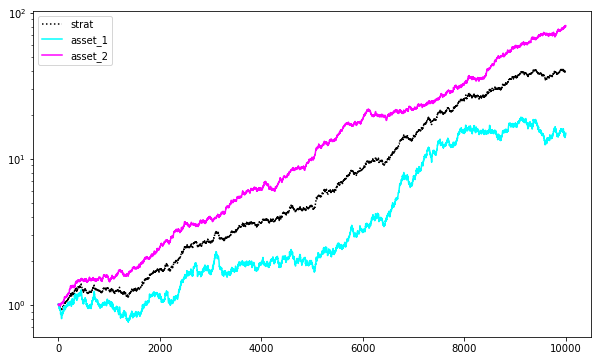

In [2]:
import matplotlib.pyplot as plt

# Markow chain to decide the regime
n = 10000
ret = 0.001
P = np.array([[0.5, 0.5], # negative transition prob
              [0.1, 0.9]])  # positive transition prob

i = 0;
switch = [0]
I = np.arange(len(P))
for _ in range(n):    
    i = np.random.choice(I, p = P[i])        
    switch.append(i);

# Return based on regime
switch_rets = pd.Series(switch).map({1: ret, 0: -3*ret})

# Adding noise to returns (one asset more volatile then the other)
path_1 = switch_rets + np.random.normal(0, 0.01, len(switch_rets))
path_2 = switch_rets + np.random.normal(0, 0.005, len(switch_rets))
bmk = ((path_1 + path_2)/2 + 1).cumprod()

path_1.name = 'asset_1'
path_2.name = 'asset_2'
bmk.name = 'strat'

ri_1 = (path_1 + 1).cumprod()
ri_2 = (path_2 + 1).cumprod()

fig = plt.figure(1, figsize=(10, 6))
ax1 = fig.add_subplot(111)
bmk.plot(legend='strat', color='black', linestyle='dotted', ax=ax1)  
pd.concat([ri_1, ri_2], axis=1).plot(cmap='cool', ax=ax1, logy=True)
plt.show()

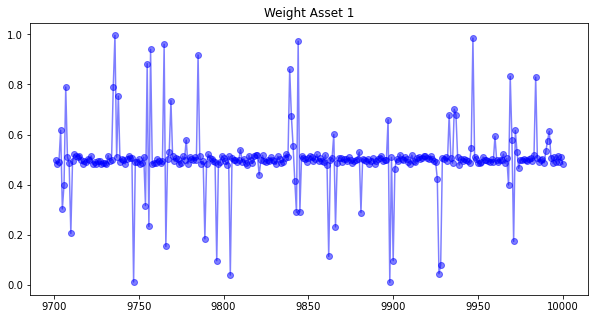

In [13]:
signal = switch
noise = 0.1
signal_noised_1 = abs((pd.Series(signal) - np.random.uniform(0, noise, len(signal))))
signal_noised_2 = abs((pd.Series(signal) - np.random.uniform(0, noise, len(signal))))

ri_1_w_signals = (path_1 * pd.Series(signal) * 2 + 1).cumprod()
ri_2_w_signals = (path_2 * pd.Series(signal) * 2 + 1).cumprod()

ri_1_w_signals_noised = (path_2 * pd.Series(signal_noised_1) * 2 + 1).cumprod()
ri_2_w_signals_noised = (path_2 * pd.Series(signal_noised_2) * 2 + 1).cumprod()

ri_1_w_signals.name = 'ri_1_w_signals'
ri_2_w_signals.name = 'ri_2_w_signals'
ri_1_w_signals_noised.name = 'ri_1_w_signals_noised'
ri_2_w_signals_noised.name = 'ri_2_w_signals_noised'

# weight is simply obtained by dividing each signal by the sum of them 
w_noised = signal_noised_1.div(signal_noised_1 + signal_noised_2)
# w_noised = pd.Series(np.random.choice([0, 0.5, 1], size=len(signal)))  # alternative with random choice weight
w_noised.tail(300).plot(figsize=(10, 5), linestyle="-",marker="o", color='blue', alpha=0.5, title='Weight Asset 1')
plt.show()

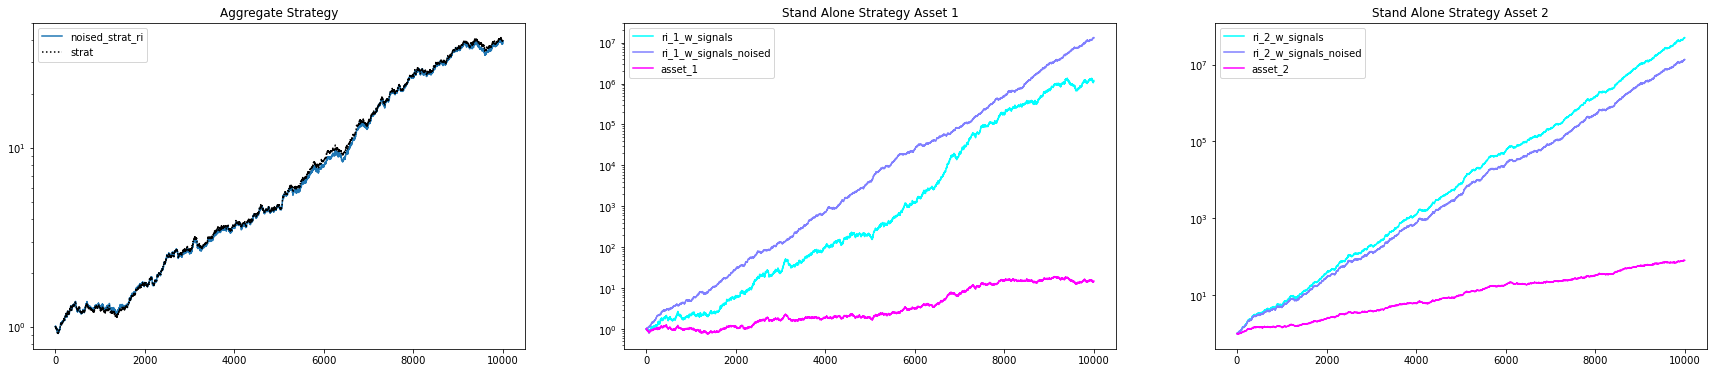

In [22]:
weights_noised = pd.concat([w_noised, 1 - w_noised], axis=1)
weights_noised.columns = ['asset_1', 'asset_2']
noised_strat_rets = weights_noised.mul(pd.concat([path_1, path_2], axis=1), axis=0).sum(axis=1)  # returns of strategy with slightly noised signals 
noised_strat_ri = (noised_strat_rets + 1).cumprod()

fig = plt.figure(1, figsize=(30, 6))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

noised_strat_ri.name = 'noised_strat_ri'
noised_strat_ri.plot(ax=ax1, legend=True)
bmk.plot(legend=True, color='black', linestyle='dotted', ax=ax1, logy = True, title='Aggregate Strategy') 

pd.concat([ri_1_w_signals, ri_1_w_signals_noised, ri_1], axis=1).plot(legend=True, logy=True, ax=ax2, title='Stand Alone Strategy Asset 1', cmap='cool')
pd.concat([ri_2_w_signals, ri_2_w_signals_noised, ri_2], axis=1).plot(legend=True, logy=True, ax=ax3, title='Stand Alone Strategy Asset 2', cmap='cool')
plt.show()

</div>

## <span style='font-family:Inter'> Time-Series Strategy</span>
[...]

## <span style='font-family:Inter'> Cross-Sectional Strategy</span>
    
> One interesting feature of cross-sectional strategies is that, in contrast to “time series” strategies, we should not expect profits from every individual stock, as some of them may serve as “hedges” on some days. Rather, profits can be obtained only in the aggregate across all the stocks.  [*E. Chan (2013)*]   

### <span style='font-family:Inter'> Information Coefficient (IC)</span>

A useful evaluation metric is the rank **information coefficient (IC)**, often referred to as rank IC. The rank IC tells us whether the ranks of our alpha values are correlated with the ranks of the future returns (using the **spearman rho**, or **rank correlation**). In other words, if the alpha factor suggested that we bet more on an asset class 1 and less on asset class 2, was the future return of asset class 1 relatively high? If the future performance of the assets matched the expectations that was suggested by the alpha factor, then the information coefficient would be higher. 

<div class="alert alert-info">
If the signals are very correlated (e.g. $\rho > 0.5$) and if we rescale the weights to sum to 1, the approach based on the information coefficient does not make sense.
</div>

